# 回测框架代码汇总
@写代码到崩溃的二幺子20190725

# WIND API使用介绍

In [21]:
# wind API是目前我觉得最好的数据，当然得有wind账号和金融终端才行
# windalgo是wind的回测框架，总体而言我觉得写得挺好，但是本地加载不了
# 万矿平台速度比较慢，我觉得和聚宽、米矿、优矿差别不大
# 代码资料来源于wind金融终端API帮助中心

## 加载数据库

In [3]:
# 点击wind菜单 量化 API接口 Python接口

In [4]:
from WindPy import w
from datetime import *

In [5]:
from WindPy import *
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [6]:
# 然后你就可以用代码生成器愉快的提取wind数据库的数据了
# 当然很多人会推荐tushare、rqdata等数据源，我都一一试过了，基本上存在数据起始时间较晚，数据量限制等问题
# 看在代码生成器的份上还是wind api接口最好用
# 当然，如果是自己整理的数据，可以用pandas的read读取本地的数据

## print 函数

In [7]:
# -*- coding:utf-8 -*-
#from WindPy import w
#from __builtin__ import str  # Python 3.0 以上版本的用户请注释掉这一句
#from datetime import *
#w.start();
# 命令如何写可以用命令生成器来辅助完成
# 定义打印输出函数，用来展示数据使用
def printpy(outdata):
    if outdata.ErrorCode!=0:
        print('error code:'+str(outdata.ErrorCode)+'\n');
        return();
    for i in range(0,len(outdata.Data[0])):
        strTemp=''
        if len(outdata.Times)>1:
            strTemp=str(outdata.Times[i])+' '
        for k in range(0, len(outdata.Fields)):
            strTemp=strTemp+str(outdata.Data[k][i])+' '
        print(strTemp)

## getdata

In [8]:
# 通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据
print('\n\n'+'-----通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据-----'+'\n')
wsddata1=w.wsd("000001.SZ", "open,high,low,close,volume,amt", "2015-11-22", "2015-12-22", "Fill=Previous")
printpy(wsddata1)



-----通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据-----

2015-11-23 12.55 12.6 12.38 12.45 60797531.00000001 760493340.6999999 
2015-11-24 12.41 12.45 12.16 12.28 66421478.0 812675943.5 
2015-11-25 12.21 12.37 12.17 12.32 51346272.0 629507063.6 
2015-11-26 12.36 12.38 12.2 12.23 55221015.0 679692129.9000001 
2015-11-27 12.18 12.2 11.53 11.73 72802594.0 867702430.5999999 
2015-11-30 11.72 11.87 11.5 11.74 65849389.0 770221398.4 
2015-12-01 11.7 11.86 11.51 11.75 68025390.0 793118214.1 
2015-12-02 11.7 12.64 11.66 12.51 161576086.0 1978750510.3 
2015-12-03 12.39 12.75 12.25 12.45 142597678.0 1786008972.1 
2015-12-04 12.31 12.38 12.08 12.12 76453245.0 934906568.6 
2015-12-07 12.18 12.25 12.04 12.15 40279265.0 488370699.4 
2015-12-08 12.07 12.09 11.9 11.96 50310179.0 602568625.9 
2015-12-09 11.92 12.12 11.9 11.99 42938435.0 515596474.9 
2015-12-10 11.95 12.14 11.91 11.96 41760358.0 502326072.6 
2015-12-11 11.91 11.92 11.73 11.83 37950803.0 448800941.40000004 
2015-12-14 11.73 12.11 11.71 12.07 5872366

In [9]:
# 通过wsd来提取各个报告期财务数据
print('\n\n'+'-----通过wsd来提取各个报告期财务数据-----'+'\n')
wsddata2=w.wsd("600000.SH", "tot_oper_rev,tot_oper_cost,opprofit,net_profit_is", "2008-01-01", "2015-12-22", "rptType=1;Period=Q;Days=Alldays;Fill=Previous")
printpy(wsddata2)

# 通过wss来取截面数据
print('\n\n'+'-----通过wss来取截面数据-----'+'\n')
wssdata=w.wss("600000.SH,600007.SH,600016.SH", "ev,total_shares","tradeDate=20151222;industryType=1")
printpy(wssdata)

# 通过wst来取日内成交数据
print('\n\n'+'-----通过wst来取日内成交数据-----'+'\n')
wstdata=w.wst("IF.CFE", "last,volume", "2015-12-22 09:00:00", "2015-12-22 14:04:45")
printpy(wstdata)

# 通过wsi来取日内分钟数据
print('\n\n'+'-----通过wsi来取日内分钟数据-----'+'\n')
wsidata=w.wsi("IF.CFE", "open,high,low,close,volume,amt", "2015-12-22 09:00:00", "2015-12-22 14:06:15")
printpy(wsidata)

# 通过wset来取数据集数据
print('\n\n'+'-----通过wset来取数据集数据,获取沪深300指数权重-----'+'\n')
wsetdata=w.wset("IndexConstituent","date=20151222;windcode=000300.SH;field=date,wind_code,i_weight")
printpy(wsetdata)



-----通过wsd来提取各个报告期财务数据-----

2008-03-31 8037934609.16 4341997032.89 3695937576.26 2811626623.85 
2008-06-30 16706134817.2 8295917912.2 8410216905.0 6374787462.92 
2008-09-30 25707444293.87 12747563588.31 12959880705.56 9843965479.11 
2008-12-31 34560566788.64 19228557614.51 15332009174.13 12515831460.26 
2009-03-31 7902030345.63 4038255184.73 3863775160.9 2960465617.63 
2009-06-30 16677371140.63 7706009060.0 8971362080.63 6781372028.83 
2009-09-30 26342162719.94 12756750239.58 13585412480.36 10290733118.98 
2009-12-31 36823932168.81 19645558467.25 17178373701.56 13215137235.95 
2010-03-31 10724015294.41 5351717690.01 5372297604.4 4104843212.93 
2010-06-30 22751490723.82 11065883236.83 11685607486.99 9082585865.13 
2010-09-30 35891712724.54 16718701113.91 19173011610.63 14845366054.04 
2010-12-31 49855850666.76 24783798957.21 25072051709.55 19178586640.94 
2011-03-31 15195988239.84 7320622965.11 7875365274.73 6073978805.69 
2011-06-30 31865108000.0 14926720000.0 16938388000.0 12910687

## APIDataToPandas

In [11]:
import pandas as pd
import datetime

In [12]:
# 取数据的命令如何写可以用命令生成器来辅助完成
wsd_data=w.wsd("000001.SZ", "open,high,low,close", "2015-12-10", "2015-12-22", "Fill=Previous")

In [13]:
#演示如何将api返回的数据装入Pandas的Series
open=pd.Series(wsd_data.Data[0])
high=pd.Series(wsd_data.Data[1])
low=pd.Series(wsd_data.Data[2])
close=pd.Series(wsd_data.Data[3])

In [14]:
print('open:/n',open)
print('high:/n',high)
print('low:/n',low)
print('close:/n',close)

open:/n 0    11.95
1    11.91
2    11.73
3    12.03
4    11.98
5    11.97
6    12.03
7    12.14
8    12.50
dtype: float64
high:/n 0    12.14
1    11.92
2    12.11
3    12.09
4    12.01
5    12.14
6    12.55
7    12.72
8    12.62
dtype: float64
low:/n 0    11.91
1    11.73
2    11.71
3    11.86
4    11.88
5    11.96
6    12.02
7    12.11
8    12.38
dtype: float64
close:/n 0    11.96
1    11.83
2    12.07
3    11.92
4    11.89
5    12.07
6    12.23
7    12.51
8    12.43
dtype: float64


In [15]:
#演示如何将api返回的数据装入Pandas的DataFrame
fm=pd.DataFrame(wsd_data.Data,index=wsd_data.Fields,columns=wsd_data.Times)
fm=fm.T #将矩阵转置
print('fm:/n',fm)

fm:/n              OPEN   HIGH    LOW  CLOSE
2015-12-10  11.95  12.14  11.91  11.96
2015-12-11  11.91  11.92  11.73  11.83
2015-12-14  11.73  12.11  11.71  12.07
2015-12-15  12.03  12.09  11.86  11.92
2015-12-16  11.98  12.01  11.88  11.89
2015-12-17  11.97  12.14  11.96  12.07
2015-12-18  12.03  12.55  12.02  12.23
2015-12-21  12.14  12.72  12.11  12.51
2015-12-22  12.50  12.62  12.38  12.43


## getStockCode

In [16]:
import json

In [17]:
#获取上交所A股代码#
AllShAStock = w.wset("SectorConstituent","date=20151122;sectorId=a001010200000000;field=wind_code");
if AllShAStock.ErrorCode != 0:
        print("Get Data failed! exit!")
        exit()
#获取深圳交所A股代码#
AllSzAStock = w.wset("SectorConstituent","date=20151122;sectorId=a001010300000000;field=wind_code");
if AllSzAStock.ErrorCode != 0:
        print("Get Data failed! exit!")
        exit()
#获取所有A股代码#
AllAStock =w.wset("SectorConstituent","date=20151122;sectorId=a001010100000000;field=wind_code");
if AllAStock.ErrorCode != 0:
    print("Get Data failed! exit!")
    exit()

In [18]:
#保存股票代码到文件中#
with open('AllSzAStock.json',mode='w') as f:json.dump(AllSzAStock.Data[0],f);
with open('AllShAStock.json',mode='w') as f1:json.dump(AllShAStock.Data[0],f1);
with open('AllAStock.json',mode='w') as f2:json.dump(AllAStock.Data[0],f2);

#使用时使用with open('entry.json', 'r') as f:Data = json.load(f)#

TypeError: 'Series' object is not callable

## wsqsave

应用简介：
基于Python语言，使用wsq订阅数据，然后存储到硬盘中。

使用介绍：
该案例是演示wsq实时行情订阅的使用，订阅模式主要有两部分组成，一部分是用wsq函数订阅所需要的行情，
另一部分是编写自己的回调函数，用于处理实时推送过来的行情数据
myCallback(indata) 即为本案例所使用的回调函数，回调函数有且只能有一个参数：indata
indata的数据结构如下：
indata.ErrorCode 错误码，如果为0表示运行正常
indata.StateCode 状态字段，使用时无需处理
indata.RequestID 存放对应wsq请求的RequestID
indata.Codes 存放行情对应的code
indata.Fields 存放行情数据对应的指标
indata.Times 存放本地时间，注意这个不是行情对应的时间，要获取行情对应的时间，请订阅rt_time指标
indata.Data 存放行情数据

取消订阅可使用w.cancelRequest(requestID),如果想取消全部订阅，可使用w.cancelRequest(0)

例如:
indata.ErrorCode=0

indata.StateCode=1

indata.RequestID=3

indata.Codes=[IF.CFE]

indata.Fields=[RT_LAST]

indata.Times=[20151123 15:12:40]

indata.Data=[[3623.0]]


In [19]:
#open a file to write.
pf = open('c:\\pywsqdataif.data', 'w')

#define the callback function
#用于处理行情的回调函数
def myCallback(indata):
    print(indata)
    if indata.ErrorCode!=0:
        print('error code:'+str(indata.ErrorCode)+'\n');
        return();

    global begintime
    lastvalue ="";
    for k in range(0,len(indata.Fields)):
         if(indata.Fields[k] == "RT_TIME"):
            begintime = indata.Data[k][0];
         if(indata.Fields[k] == "RT_LAST"):
            lastvalue = str(indata.Data[k][0]);

    string = str(begintime) + " " + lastvalue +"\n";
    pf.writelines(string)
    print(string);
    pf.flush();

    #想要结束订阅，可使用w.cancelRequest(0)命令，然后后调用pf.close()关闭文件
    #pf.close();


#订阅行情
w.wsq("IF.CFE","rt_time,rt_last",func=myCallback)
while(1):
    info="这个while循环主要是防止IDE在运行或者debug时，运行w.wsq()语句后就退出，从而导致行情推送过来后，回调函数无法运行！";

TypeError: 'Series' object is not callable

## WindAlgo

In [20]:
from WindAlgo import * #引入回测框架
import talib as ta  #引入talib用于计算技术指标

def initialize(context):#定义初始化函数
    context.capital = 1000000 #回测的初始资金
    context.securities = ["600519.SH","600178.SH","600179.SH","600180.SH","600182.SH","600183.SH","600184.SH","600185.SH","600186.SH","600187.SH","600188.SH"] #回测标的
    context.start_date = "20160101" #回测开始时间
    context.end_date = "20170501" #回测结束时间
    context.period = 'd' #策略运行周期, 'd' 代表日, 'm'代表分钟


def handle_data(bar_datetime, context, bar_data):#定义策略函数
    his= wa.history('600519.SH',30) #使用history函数获取近期历史行情
    ma5=ta.MA(np.array(his.get_field('close')), timeperiod=5, matype=0) #使用talib技术指标库计算5日均线
    ma20=ta.MA(np.array(his.get_field('close')), timeperiod=20, matype=0)
    position=wa.query_position() #查询当前持仓
    if('600519.SH' in position.get_field('code')): #如果当前持仓中有600519.SH
        if(ma5[-1]<ma20[-1]): #如果5日均线下穿20日均线，则卖出所有股票
            wa.batch_order.sell_all()
    else:
        if('600519.SH' not in position.get_field('code')): #如果当前持仓中没有600519.SH
            if(ma5[-1]>ma20[-1]): #如果5日均线上穿20日均线，则买入股票
                res = wa.order('600519.SH', 200, 'buy')
                wa.order('600178.SH', 200, 'buy')
                wa.order('600179.SH', 200, 'buy')
                wa.order('600180.SH', 200, 'buy')
                wa.order('600182.SH', 200, 'buy')
                wa.order('600183.SH', 200, 'buy')
                wa.order('600184.SH', 200, 'buy')
                wa.order('600185.SH', 200, 'buy')
                wa.order('600186.SH', 200, 'buy')
                wa.order('600187.SH', 200, 'buy')
                wa.order('600188.SH', 200, 'buy')
                wa.order('600189.SH', 200, 'buy')
                wa.order('600190.SH', 200, 'buy')


wa = BackTest(init_func = initialize, handle_data_func=handle_data) #实例化回测对象
res = wa.run(show_progress=True) #调用run()函数开始回测,show_progress可用于指定是否显示回测净值曲线图
nav_df=wa.summary('nav') #获取回测结果

ModuleNotFoundError: No module named 'WindAlgo'

# 将信号与回测结合的框架

In [35]:
# 直接将指标写入回测框架中
# 考虑单边万二的手续费率
# 单个资产或者配比不变的资产包的技术指标择时框架
# 资料来源：（我没在历史记录里找到呜呜呜，下次再补）

## 加载包

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import talib as ta
from WindPy import w
from datetime import *
from WindPy import *

w.start()

.ErrorCode=0
.Data=[Already conntected!]

## 定义策略函数与回测系统

### 均线策略

In [23]:
def Strategy(pdatas, win_long, win_short, lossratio=999):
    pdatas = pdatas.copy()
    pdatas['lma'] = pdatas.CLOSE.rolling(win_long, min_periods=0).mean()
    pdatas['sma'] = pdatas.CLOSE.rolling(win_short, min_periods=0).mean()
    pdatas['position'] = 0  # 记录持仓
    pdatas['flag'] = 0  # 记录买卖
    pricein = []
    priceout = []
    price_in = 1
    for i in range(max(1, win_long), pdatas.shape[0] - 1):
        # 当前无仓位，短均线上穿长均线，做多
        if (pdatas.sma[i - 1] < pdatas.lma[i - 1]) & (pdatas.sma[i] > pdatas.lma[i]) & (pdatas.position[i] == 0):
            pdatas.loc[i, 'flag'] = 1
            pdatas.loc[i + 1, 'position'] = 1
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 1.0002
            date_in = pdatas.date[i]
            price_in = pdatas.loc[i, 'CLOSE']
            pricein.append([date_in, price_in])
        # 当前持仓，下跌超出止损率，止损
        elif (pdatas.position[i] == 1) & (pdatas.CLOSE[i] / price_in - 1 < -lossratio):
            pdatas.loc[i, 'flag'] = -1
            pdatas.loc[i + 1, 'position'] = 0
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([pdatas.date[i], pdatas.loc[i, 'CLOSE']])
        # 当前持仓，死叉，平仓
        elif (pdatas.sma[i - 1] > pdatas.lma[i - 1]) & (pdatas.sma[i] < pdatas.lma[i]) & (pdatas.position[i] == 1):
            pdatas.loc[i, 'flag'] = -1
            pdatas.loc[i + 1, 'position'] = 0
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([pdatas.date[i], pdatas.loc[i, 'CLOSE']])
        # 其他情况，保持之前仓位不变
        else:
            pdatas.loc[i + 1, 'position'] = pdatas.loc[i, 'position']
    p1 = pd.DataFrame(pricein, columns=['datebuy', 'pricebuy'])
    p2 = pd.DataFrame(priceout, columns=['datesell', 'pricesell'])
    transactions = pd.concat([p1, p2], axis=1)
    pdatas = pdatas.loc[max(0, win_long):, :].reset_index(drop=True)
    pdatas['ret'] = pdatas.CLOSE.pct_change(1).fillna(0)
    pdatas['nav'] = (1 + pdatas.ret * pdatas.position).cumprod()
    pdatas['benchmark'] = pdatas.CLOSE / pdatas.CLOSE[0]
    stats, result_peryear = performace(transactions, pdatas)
    return stats, result_peryear, transactions, pdatas

def performace(transactions, strategy):
    # strategy = pdatas.copy()
    N = 250
    # 年化收益率
    rety = strategy.nav[strategy.shape[0] - 1] ** (N / strategy.shape[0]) - 1
    # 夏普比
    Sharp = (strategy.ret * strategy.position).mean() / (strategy.ret * strategy.position).std() * np.sqrt(N)
    # 胜率
    VictoryRatio = ((transactions.pricesell - transactions.pricebuy) > 0).mean()
    DD = 1 - strategy.nav / strategy.nav.cummax()
    MDD = max(DD)
    # 策略逐年表现
    # strategy['year'] = strategy.date.apply(lambda x: x[:4])
    strategy['year'] = strategy.date
    nav_peryear = strategy.nav.groupby(strategy.year).last() / strategy.nav.groupby(strategy.year).first() - 1
    benchmark_peryear = strategy.benchmark.groupby(strategy.year).last() / strategy.benchmark.groupby(
        strategy.year).first() - 1
    excess_ret = nav_peryear - benchmark_peryear
    result_peryear = pd.concat([nav_peryear, benchmark_peryear, excess_ret], axis=1)
    result_peryear.columns = ['strategy_ret', 'bench_ret', 'excess_ret']
    result_peryear = result_peryear.T

    # 作图
    xtick = np.round(np.linspace(0, strategy.shape[0] - 1, 7), 0)
    xticklabel = strategy.date[xtick]
    plt.figure(figsize=(9, 4))
    ax1 = plt.axes()
    plt.plot(np.arange(strategy.shape[0]), strategy.benchmark, 'black', label='benchmark', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav, 'red', label='nav', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav / strategy.benchmark, 'orange', label='RS', linewidth=2)
    plt.legend()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xticklabel)
    maxloss = min(transactions.pricesell / transactions.pricebuy - 1)
    plt.show()
    print('------------------------------')
    print('夏普比为:', round(Sharp, 2))
    print('年化收益率为:{}%'.format(round(rety * 100, 2)))
    print('胜率为：{}%'.format(round(VictoryRatio * 100, 2)))
    print('最大回撤率为：{}%'.format(round(MDD * 100, 2)))
    print('单次最大亏损为:{}%'.format(round(-maxloss * 100, 2)))
    print('月均交易次数为：{}(买卖合计)'.format(round(strategy.flag.abs().sum() / strategy.shape[0] * 20, 2)))

    result = {'Sharp': Sharp,
              'RetYearly': rety,
              'WinRate': VictoryRatio,
              'MDD': MDD,
              'maxlossOnce': -maxloss,
              'num': round(strategy.flag.abs().sum() / strategy.shape[0], 1)}
    result = pd.DataFrame.from_dict(result, orient='index').T
    return result, result_peryear

In [24]:
wsd_data=w.wsd("000016.SH", "close", "2010-11-22", "2015-12-22")
pdatas=pd.DataFrame(wsd_data.Data,index=wsd_data.Fields).T
pdatas['date']=wsd_data.Times

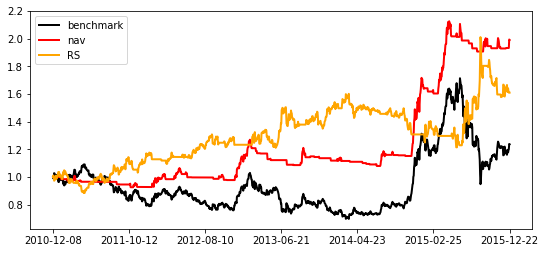

------------------------------
夏普比为: 1.09
年化收益率为:15.08%
胜率为：19.3%
最大回撤率为：14.97%
单次最大亏损为:3.51%
月均交易次数为：1.84(买卖合计)


(      Sharp  RetYearly   WinRate       MDD  maxlossOnce  num
 0  1.091271   0.150798  0.192982  0.149664     0.035075  0.1,
 year          2010-12-08  2010-12-09  2010-12-10  2010-12-13  2010-12-14  \
 strategy_ret         0.0         0.0         0.0         0.0         0.0   
 bench_ret            0.0         0.0         0.0         0.0         0.0   
 excess_ret           0.0         0.0         0.0         0.0         0.0   
 
 year          2010-12-15  2010-12-16  2010-12-17  2010-12-20  2010-12-21  ...  \
 strategy_ret         0.0         0.0         0.0         0.0         0.0  ...   
 bench_ret            0.0         0.0         0.0         0.0         0.0  ...   
 excess_ret           0.0         0.0         0.0         0.0         0.0  ...   
 
 year          2015-12-09  2015-12-10  2015-12-11  2015-12-14  2015-12-15  \
 strategy_ret         0.0         0.0         0.0         0.0         0.0   
 bench_ret            0.0         0.0         0.0         0.0         0.0   
 exc

In [25]:
Strategy(pdatas, 12, 5, 0)

### MACD策略

In [31]:
def Strategy(pdatas, win_long=26, win_short=12, win_macd=20,lossratio=999):
    pdatas = pdatas.copy()
    macd_tmp = ta.MACD(pdatas.CLOSE, fastperiod=win_short, slowperiod=win_long,
                          signalperiod=win_macd)
    DIF = macd_tmp[0]
    DEA = macd_tmp[1]
    MACD = macd_tmp[2]
    pdatas['MACD'] = MACD
    pdatas['position'] = 0  # 记录持仓
    pdatas['flag'] = 0  # 记录买卖
    pricein = []
    priceout = []
    price_in = 1
    for i in range(max(1, win_long), pdatas.shape[0] - 1):
        # 当前无仓位，短均线上穿长均线，做多
        if (pdatas.MACD[i-1] > 0 and pdatas.MACD[i-4] < 0):
            pdatas.loc[i, 'flag'] = 1
            pdatas.loc[i + 1, 'position'] = 1
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 1.0002
            date_in = pdatas.date[i]
            price_in = pdatas.loc[i, 'CLOSE']
            pricein.append([date_in, price_in])
        # 当前持仓，下跌超出止损率，止损
        elif (pdatas.position[i] == 1) & (pdatas.CLOSE[i] / price_in - 1 < -lossratio):
            pdatas.loc[i, 'flag'] = -1
            pdatas.loc[i + 1, 'position'] = 0
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([pdatas.date[i], pdatas.loc[i, 'CLOSE']])
        # 当前持仓，死叉，平仓
        elif (pdatas.MACD[i-1] < 0 and pdatas.MACD[i-4] > 0):
            pdatas.loc[i, 'flag'] = -1
            pdatas.loc[i + 1, 'position'] = 0
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([pdatas.date[i], pdatas.loc[i, 'CLOSE']])
        # 其他情况，保持之前仓位不变
        else:
            pdatas.loc[i + 1, 'position'] = pdatas.loc[i, 'position']
    p1 = pd.DataFrame(pricein, columns=['datebuy', 'pricebuy'])
    p2 = pd.DataFrame(priceout, columns=['datesell', 'pricesell'])
    transactions = pd.concat([p1, p2], axis=1)
    pdatas = pdatas.loc[max(0, win_long):, :].reset_index(drop=True)
    pdatas['ret'] = pdatas.CLOSE.pct_change(1).fillna(0)
    pdatas['nav'] = (1 + pdatas.ret * pdatas.position).cumprod()
    pdatas['benchmark'] = pdatas.CLOSE / pdatas.CLOSE[0]
    stats, result_peryear = performace(transactions, pdatas)
    return stats, result_peryear, transactions, pdatas


def performace(transactions, strategy):
    # strategy = pdatas.copy()
    N = 250
    # 年化收益率
    rety = strategy.nav[strategy.shape[0] - 1] ** (N / strategy.shape[0]) - 1
    # 夏普比
    Sharp = (strategy.ret * strategy.position).mean() / (strategy.ret * strategy.position).std() * np.sqrt(N)
    # 胜率
    VictoryRatio = ((transactions.pricesell - transactions.pricebuy) > 0).mean()
    DD = 1 - strategy.nav / strategy.nav.cummax()
    MDD = max(DD)
    # 策略逐年表现
    # strategy['year'] = strategy.date.apply(lambda x: x[:4])
    strategy['year'] = strategy.date
    nav_peryear = strategy.nav.groupby(strategy.year).last() / strategy.nav.groupby(strategy.year).first() - 1
    benchmark_peryear = strategy.benchmark.groupby(strategy.year).last() / strategy.benchmark.groupby(
        strategy.year).first() - 1
    excess_ret = nav_peryear - benchmark_peryear
    result_peryear = pd.concat([nav_peryear, benchmark_peryear, excess_ret], axis=1)
    result_peryear.columns = ['strategy_ret', 'bench_ret', 'excess_ret']
    result_peryear = result_peryear.T

    # 作图
    xtick = np.round(np.linspace(0, strategy.shape[0] - 1, 7), 0)
    xticklabel = strategy.date[xtick]
    plt.figure(figsize=(9, 4))
    ax1 = plt.axes()
    plt.plot(np.arange(strategy.shape[0]), strategy.benchmark, 'black', label='benchmark', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav, 'red', label='nav', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav / strategy.benchmark, 'orange', label='RS', linewidth=2)
    plt.legend()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xticklabel)
    maxloss = min(transactions.pricesell / transactions.pricebuy - 1)
    plt.show()
    print('------------------------------')
    print('夏普比为:', round(Sharp, 2))
    print('年化收益率为:{}%'.format(round(rety * 100, 2)))
    print('胜率为：{}%'.format(round(VictoryRatio * 100, 2)))
    print('最大回撤率为：{}%'.format(round(MDD * 100, 2)))
    print('单次最大亏损为:{}%'.format(round(-maxloss * 100, 2)))
    print('月均交易次数为：{}(买卖合计)'.format(round(strategy.flag.abs().sum() / strategy.shape[0] * 20, 2)))

    result = {'Sharp': Sharp,
              'RetYearly': rety,
              'WinRate': VictoryRatio,
              'MDD': MDD,
              'maxlossOnce': -maxloss,
              'num': round(strategy.flag.abs().sum() / strategy.shape[0], 1)}
    result = pd.DataFrame.from_dict(result, orient='index').T
    return result, result_peryear

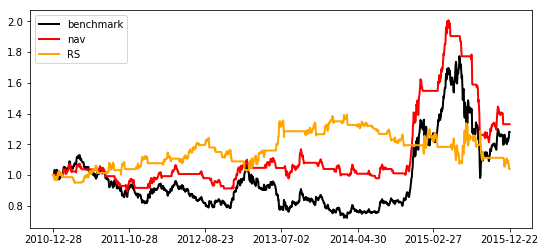

------------------------------
夏普比为: 0.43
年化收益率为:6.08%
胜率为：36.59%
最大回撤率为：39.55%
单次最大亏损为:25.3%
月均交易次数为：2.71(买卖合计)


(      Sharp  RetYearly   WinRate       MDD  maxlossOnce  num
 0  0.425341   0.060812  0.365854  0.395521     0.252951  0.1,
 year          2010-12-28  2010-12-29  2010-12-30  2010-12-31  2011-01-04  \
 strategy_ret         0.0         0.0         0.0         0.0         0.0   
 bench_ret            0.0         0.0         0.0         0.0         0.0   
 excess_ret           0.0         0.0         0.0         0.0         0.0   
 
 year          2011-01-05  2011-01-06  2011-01-07  2011-01-10  2011-01-11  ...  \
 strategy_ret         0.0         0.0         0.0         0.0         0.0  ...   
 bench_ret            0.0         0.0         0.0         0.0         0.0  ...   
 excess_ret           0.0         0.0         0.0         0.0         0.0  ...   
 
 year          2015-12-09  2015-12-10  2015-12-11  2015-12-14  2015-12-15  \
 strategy_ret         0.0         0.0         0.0         0.0         0.0   
 bench_ret            0.0         0.0         0.0         0.0         0.0   
 exc

In [32]:
Strategy(pdatas)

### MACD平滑异同

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
def Strategy(pdatas, longWin=52, shortWin=26, macdWin=15,lossratio=999):
    pdatas = pdatas.copy()
    histMACD = pd.DataFrame( index=pdatas.index,
                            columns=['preShortEMA', 'preLongEMA', 'preDIF', 'preDEA'])
    histMACD[1, 'preShortEMA'] = pdatas.CLOSE[1]
    histMACD[1, 'preLongEMA'] = pdatas.CLOSE[1]
    histMACD[1, 'preDIF'] = 0
    histMACD[1, 'preDEA'] = 0
    for i in range(1,pdatas.shape[0]-1):#(max(1, longWin), pdatas.shape[0] - 1):
        histMACD[i+1,'preShortEMA'] = histMACD[i,'preShortEMA'] * 1.0 * (shortWin - 1) / (shortWin + 1)+ pdatas.CLOSE[i] * 2.0 / (shortWin + 1)
        histMACD[i+1,'preLongEMA'] = histMACD[i,'preLongEMA'] * 1.0 * (longWin - 1) / (longWin + 1) +  pdatas.CLOSE[i] * 2.0 / (longWin + 1)
        histMACD[i+1,'preDIF']=histMACD[i,'preShortEMA'] - histMACD[i,'preLongEMA']
        histMACD[i+1,'preDEA']=histMACD[i,'preDEA'] * 1.0 * (macdWin - 1) / (macdWin + 1) + histMACD[i,'preDIF'] * 2.0 / (macdWin +1)


    pdatas['position'] = 0  # 记录持仓
    pdatas['flag'] = 0  # 记录买卖
    pricein = []
    priceout = []
    price_in = 1
    for i in range(max(1, longWin), pdatas.shape[0] - 1):
        # 当前无仓位，短均线上穿长均线，做多
        if (histMACD[i,'preDIF'].all() > histMACD[i,'preDEA'].all() and
                histMACD[i,'preDIF'].all()  < histMACD[i,'preDEA'].all()):
            pdatas.loc[i, 'flag'] = 1
            pdatas.loc[i + 1, 'position'] = 1
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 1.0002
            date_in = pdatas.date[i]
            price_in = pdatas.loc[i, 'CLOSE']
            pricein.append([date_in, price_in])
        # 当前持仓，下跌超出止损率，止损
        elif (pdatas.position[i] == 1) & (pdatas.CLOSE[i] / price_in - 1 < -lossratio):
            pdatas.loc[i, 'flag'] = -1
            pdatas.loc[i + 1, 'position'] = 0
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([pdatas.date[i], pdatas.loc[i, 'CLOSE']])
        # 当前持仓，死叉，平仓
        elif (histMACD[i,'preDIF'].all() < histMACD[i,'preDEA'].all() and
                histMACD[i,'preDIF'].all() > histMACD[i,'preDEA'].all()):
            pdatas.loc[i, 'flag'] = -1
            pdatas.loc[i + 1, 'position'] = 0
            pdatas.loc[i, 'CLOSE'] = pdatas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([pdatas.date[i], pdatas.loc[i, 'CLOSE']])
        # 其他情况，保持之前仓位不变
        else:
            pdatas.loc[i + 1, 'position'] = pdatas.loc[i, 'position']
    p1 = pd.DataFrame(pricein, columns=['datebuy', 'pricebuy'])
    p2 = pd.DataFrame(priceout, columns=['datesell', 'pricesell'])
    transactions = pd.concat([p1, p2], axis=1)
    pdatas = pdatas.loc[max(0, longWin):, :].reset_index(drop=True)
    pdatas['ret'] = pdatas.CLOSE.pct_change(1).fillna(0)
    pdatas['nav'] = (1 + pdatas.ret * pdatas.position).cumprod()
    pdatas['benchmark'] = pdatas.CLOSE / pdatas.CLOSE[0]
    stats, result_peryear = performace(transactions, pdatas)
    return stats, result_peryear, transactions, pdatas


def performace(transactions, strategy):
    # strategy = pdatas.copy()
    N = 250
    # 年化收益率
    rety = strategy.nav[strategy.shape[0] - 1] ** (N / strategy.shape[0]) - 1
    # 夏普比
    Sharp = (strategy.ret * strategy.position).mean() / (1+(strategy.ret * strategy.position).std() * np.sqrt(N))
    # 胜率
    VictoryRatio = ((transactions.pricesell - transactions.pricebuy) > 0).mean()
    DD = 1 - strategy.nav / strategy.nav.cummax()
    MDD = max(DD)
    # 策略逐年表现
    # strategy['year'] = strategy.date.apply(lambda x: x[:4])
    strategy['year'] = strategy.date
    nav_peryear = strategy.nav.groupby(strategy.year).last() / strategy.nav.groupby(strategy.year).first() - 1
    benchmark_peryear = strategy.benchmark.groupby(strategy.year).last() / strategy.benchmark.groupby(
        strategy.year).first() - 1
    excess_ret = nav_peryear - benchmark_peryear
    result_peryear = pd.concat([nav_peryear, benchmark_peryear, excess_ret], axis=1)
    result_peryear.columns = ['strategy_ret', 'bench_ret', 'excess_ret']
    result_peryear = result_peryear.T

    # 作图
    xtick = np.round(np.linspace(0, strategy.shape[0] - 1, 7), 0)
    xticklabel = strategy.date[xtick]
    plt.figure(figsize=(9, 4))
    ax1 = plt.axes()
    plt.plot(np.arange(strategy.shape[0]), strategy.benchmark, 'black', label='benchmark', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav, 'red', label='nav', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav / strategy.benchmark, 'orange', label='RS', linewidth=2)
    plt.legend()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xticklabel)
    #maxloss = min(transactions.pricesell / transactions.pricebuy - 1)
    plt.show()
    print('------------------------------')
    print('夏普比为:', round(Sharp, 2))
    print('年化收益率为:{}%'.format(round(rety * 100, 2)))
    print('胜率为：{}%'.format(round(VictoryRatio * 100, 2)))
    print('最大回撤率为：{}%'.format(round(MDD * 100, 2)))
    print('单次最大亏损为:{}%'.format(round(-maxloss * 100, 2)))
    print('月均交易次数为：{}(买卖合计)'.format(round(strategy.flag.abs().sum() / strategy.shape[0] * 20, 2)))

    result = {'Sharp': Sharp,
              'RetYearly': rety,
              'WinRate': VictoryRatio,
              'MDD': MDD,
              'maxlossOnce': -maxloss,
              'num': round(strategy.flag.abs().sum() / strategy.shape[0], 1)}
    result = pd.DataFrame.from_dict(result, orient='index').T
    return result, result_peryear

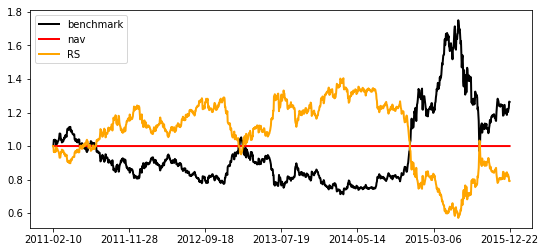

------------------------------
夏普比为: 0.0
年化收益率为:0.0%
胜率为：nan%
最大回撤率为：0.0%


NameError: name 'maxloss' is not defined

In [34]:
Strategy(pdatas)

# 考虑整数限制的回测框架

In [ ]:
# 回测时考虑下单手数为整数
# 期货为1， 股票为100，可自行进行调整
# 资料来源：暂时没找到

In [ ]:
# coding:utf-8
#import tushare as ts  #tushare包读不了数据
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from WindPy import w
from datetime import *
from WindPy import *
w.start()
class MAStrategy(object):

    ## Rule:
    ## if sma(t)>lma(t)&sma(t-1)<lma(t-1) then signal=1(buy)
    ## if sma(t)<lma(t)&sma(t-1)>lma(t-1) then signal=-1(sell)
    ## else signal=0(hold)

    def __init__(self, bars, short_window=5, long_window=60):
        self.bars = bars
        self.short_window = short_window
        self.long_window = long_window

    def MA(self, price, windows=5, period=1):
        ''' 简单移动平均线'''
        #MAprice = pd.rolling_mean(price, windows, period)
        #error:AttributeError: module 'pandas' has no attribute 'rolling_mean'
        MAprice=price.rolling(windows, period).mean()
        return MAprice

    def gen_signal(self):
        signals = pd.DataFrame(index=self.bars.index)
        signals['flag'] = 0
        signals['sma'] = self.MA(self.bars['CLOSE'], self.short_window, 1)
        signals['lma'] = self.MA(self.bars['CLOSE'], self.long_window, 1)
        signals['flag'][self.short_window:] = np.where(
            signals['sma'][self.short_window:]
            > signals['lma'][self.short_window:], 1, 0)
        signals['signal'] = signals['flag'].diff().fillna(signals['flag'][0])
        return signals


class MATrade(object):
    def __init__(self, bars, signals, init_capital=100000.0):
        self.bars = bars
        self.init_capital = init_capital
        self.signals = signals

    def gen_positions(self):
        positions = self.signals['flag'] * 1000
        return positions

    def trade_positions(self):
        positions = self.signals['signal'] * 1000
        return positions

    def trade_tracing(self):
        capital = pd.DataFrame(index=self.signals.index)
        capital['hold'] = self.gen_positions() * self.bars['CLOSE']
        capital['rest'] = self.init_capital - (self.trade_positions() * bars['CLOSE']).cumsum()
        capital['total'] = capital['hold'] + capital['rest']
        capital['return'] = capital['total'].pct_change().fillna(
            capital['total'][0] / self.init_capital - 1)
        return capital

if __name__ == '__main__':
    #使用tushare提取数据bars = ts.get_h_data('002337', start='2012-01-01', end='2015-01-01').sort_index()
    # 通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据
    print('\n\n' + '-----通过wsd来提取时间序列数据，比如取开高低收成交量，成交额数据-----' + '\n')
    wsd_data = w.wsd("000001.SZ", "open,high,low,close,volume,amt", "2010-11-22", "2015-12-22", "Fill=Previous")
    # 演示如何将api返回的数据装入Pandas的Series
    open = pd.Series(wsd_data.Data[0])
    high = pd.Series(wsd_data.Data[1])
    low = pd.Series(wsd_data.Data[2])
    close = pd.Series(wsd_data.Data[3])
    # 演示如何将api返回的数据装入Pandas的DataFrame
    bars = pd.DataFrame(wsd_data.Data, index=wsd_data.Fields, columns=wsd_data.Times).T

    test_strategy = MAStrategy(bars)
    signals = test_strategy.gen_signal()
    test_trade = MATrade(bars, signals)
    capital = test_trade.trade_tracing()
    print(signals)
    print(capital)

# 考虑因素最全的回测框架

In [ ]:
# 考虑交易手续费，前后复权，手数限制，仓位限制
# 资料来源：《padas创建一个简单的择时策略框架》
###   https://blog.csdn.net/qq_36019490/article/details/89159293

In [ ]:
# coding: utf-8 --
import pandas as pd
#pd.set_option('expand_frame_repr', False) # 当列太多时不换行

#读入数据
df = pd.read_excel('sz300001.xlsx', header=0)#,encoding='gbk')
#df.columns = [i.encode('utf8') for i in df.columns]
#df = df[['交易日期', '股票代码', '开盘价', '最高价', '最低价', '收盘价', '涨跌幅']]
#df.sort_values(by=['交易日期'],inplace=True)
df['交易日期'] = pd.to_datetime(df['交易日期'])
df.reset_index(inplace=True, drop=True)

#计算复权价
df['复权因子'] = (df['涨跌幅'] + 1).cumprod()
initial_price = df.iloc[0]['收盘价'] / (1 + df.iloc[0]['涨跌幅']) # 计算上市价格
df['收盘价_后复权'] = initial_price * df['复权因子'] # 相乘得到复权价
df['开盘价_后复权'] = df['开盘价'] / df['收盘价'] * df['收盘价_后复权']
df['最高价_后复权'] = df['最高价'] / df['收盘价'] * df['收盘价_后复权']
df['最低价_后复权'] = df['最低价'] / df['收盘价'] * df['收盘价_后复权']

df[['开盘价', '最高价', '最低价', '收盘价']] = df[['开盘价_后复权', '最高价_后复权', '最低价_后复权', '收盘价_后复权']]
df = df[['交易日期', '股票代码', '开盘价', '最高价', '最低价', '收盘价', '涨跌幅', '开盘价_后复权', '最高价_后复权', '最低价_后复权', '收盘价_后复权']]

#计算均线策略
#均线策略：
#当短期均线由下向上穿过长期均线的时候，第二天以开盘价全仓买入并在之后一直持有股票。
#当短期均线由上向下穿过长期均线的时候，第二天以开盘价卖出全部股票并在之后一直空仓，直到下一次买入。
#计算均线
ma_short = 5 # 短期均线。ma代表：moving_average
ma_long = 50 # 长期均线
df['ma_short'] = df['收盘价_后复权'].rolling(ma_short, min_periods=1).mean()
df['ma_long'] = df['收盘价_后复权'].rolling(ma_long, min_periods=1).mean()

#将缺失的均线数据补全
df['ma_short'].fillna(value=df['收盘价'].expanding().mean(), inplace=True)
df['ma_long'].fillna(value=df['收盘价'].expanding().mean(), inplace=True)
print (df)
exit()
#补全数据的另外一种方式是使用rolling函数中的min_periods参数
#找出买入信号
#当天的短期均线大于等于长期均线
condition1 = (df['ma_short'] >= df['ma_long'])

#上个交易日的短期均线小于长期均线
condition2 = (df['ma_short'].shift(1) < df['ma_long'].shift(1))

#将买入信号当天的signal设置为1
df.loc[condition1 & condition2, 'signal'] = 1

#找出卖出信号
#当天的短期均线小于等于长期均线
condition1 = (df['ma_short'] <= df['ma_long'])

#上个交易日的短期均线大于长期均线
condition2 = (df['ma_short'].shift(1) > df['ma_long'].shift(1))

#将买入信号当天的signal设置为0
df.loc[condition1 & condition2, 'signal'] = 0

#将无关的变量删除
df.drop(['ma_short', 'ma_long'], axis=1, inplace=True)

#由signal计算出实际的每天持有股票仓位
#计算仓位
#signal的计算运用了收盘价，是每天收盘之后产生的信号，到第二天的时候，仓位position才会改变。
#例如2009-11-17产生买入信号，2009-11-18仓位才会编变成1。满仓用1表示，空仓用0表示
df['pos'] = df['signal'].shift()
df['pos'].fillna(method='ffill', inplace=True)
df['pos'].fillna(value=0, inplace=True) # 将初始行数的position补全为0

#这就是实际的仓位了吗？刚刚的计算逻辑是不是有没有什么问题？
#查看20150501这几天的数据
print (df[df['交易日期'] > pd.to_datetime('20150501')][['交易日期', '开盘价_后复权', '收盘价_后复权', '涨跌幅', 'signal', 'pos']])
##涨跌停的时候是不得买卖股票的。很多人策略表现好，可能就是没有考虑这些限制。
#这类策略和实际操作不吻合的问题，是经常犯的问题。
#有的问题隐藏的很深，很多时候只有到了实盘交易的时候才会发现
#跌停时不得买卖股票考虑进来
#找出开盘涨停的日期
#今天的开盘价相对于昨天的收盘价上涨了9.7%。为什么用9.7%？不用10%
cond_cannot_buy = df['开盘价_后复权'] > df['收盘价_后复权'].shift(1) * 1.097

#将开盘涨停日、并且当天position为1时的’pos’设置为空值
df.loc[cond_cannot_buy & (df['pos'] == 1), 'pos'] = None

print (df[df['交易日期'] > pd.to_datetime('20150501')][['交易日期', '开盘价_后复权', '收盘价_后复权', '涨跌幅', 'signal', 'pos']])
##找出开盘跌停的日期
#今天的开盘价相对于昨天的收盘价下跌了9.7%
cond_cannot_sell = df['开盘价_后复权'] < df['收盘价_后复权'].shift(1) * 0.903

#将开盘跌停日、并且当天position为0时的’pos’设置为空值
df.loc[cond_cannot_sell & (df['pos'] == 0), 'pos'] = None

#position为空的日期，不能买卖。position只能和前一个交易日保持一致。
df['pos'].fillna(method='ffill', inplace=True)

print (df[df['交易日期'] > pd.to_datetime('20150501')][['交易日期', '开盘价_后复权', '收盘价_后复权', '涨跌幅', 'signal', 'pos']])
#截取上市一年之后的交易日
df = df.iloc[250-1:]

#将第一天的仓位设置为0
df.iloc[0, -1] = 0

print (df[['交易日期', '开盘价_后复权', '收盘价_后复权', '涨跌幅', 'signal', 'pos']])
exit()
#计算实际资金曲线(简单方法)
"""
资金曲线是一个策略最终的结果。是评价一个策略最重要的标准。
==计算实际资金曲线
首先计算资金曲线每天的涨幅
当当天空仓时，pos为0，资产涨幅为0
当当天满仓时，pos为1，资产涨幅为股票本身的涨跌幅
"""
df['equity_change'] = df['涨跌幅'] * df['pos']

#根据每天的涨幅计算资金曲线
df['equity_curve'] = (df['equity_change'] + 1).cumprod()

print (df[['交易日期', '收盘价_后复权', 'pos', 'equity_change', 'equity_curve']])
exit()
"""
这样计算方式的缺点：
没有考虑交给券商的手续费,以及没有考虑交给国家的印花税
没有考虑交易的滑点
以及没有考
"""
#计算实际资金曲线(实际方法)
df = df[['交易日期', '股票代码', '开盘价', '最高价', '最低价', '收盘价', '涨跌幅', 'pos']]
df.reset_index(inplace=True, drop=True)

#设定参数
initial_money = 1000000 # 初始资金，默认为1000000元
slippage = 0.01 # 滑点，默认为0.01元
c_rate = 5.0 / 10000 # 手续费，commission fees，默认为万分之5
t_rate = 1.0 / 1000 # 印花税，tax，默认为千分之1

#第一天的情况
df.at[0, 'hold_num'] = 0 # 持有股票数量，此处也可用loc，但是定位单个元素at效率更高。
df.at[0, 'stock_value'] = 0 # 持仓股票市值
df.at[0, 'actual_pos'] = 0 # 每日的实际仓位
df.at[0, 'cash'] = initial_money # 持有现金现金
df.at[0, 'equity'] = initial_money # 总资产 = 持仓股票市值 + 现金
print (df[['交易日期 ','开盘价','pos', 'hold_num', 'stock_value', 'actual_pos','cash', 'equity']])
#第一天之后每天的情况
#从第二行开始，逐行遍历，逐行计算
for i in range(1, df.shape[0]):

# 前一天持有的股票的数量
    hold_num = df.at[i - 1, 'hold_num']

# 判断当天是否除权，若发生除权，需要调整hold_num
# 若当天通过收盘价计算出的涨跌幅，和当天实际涨跌幅不同，说明当天发生了除权
    if abs((df.at[i, '收盘价'] / df.at[i-1, '收盘价'] - 1) - df.at[i, '涨跌幅']) > 0.001:
        stock_value = df.at[i - 1, 'stock_value']
    # 交易所会公布除权之后的价格
        last_price = df.at[i, '收盘价'] / (df.at[i, '涨跌幅'] + 1)
        hold_num = stock_value / last_price
        hold_num = int(hold_num)
    # if i > 1030:
    #     print stock_value, last_price, hold_num
    #     print df.iloc[1034:][['交易日期', '收盘价', '涨跌幅', 'pos', 'hold_num', 'cash', 'stock_value']]

# 判断是否需要调整仓位：拿今天的仓位pos，和昨天的仓位pos进行比较，看是否相同
# 需要调整仓位
    if df.at[i, 'pos'] != df.at[i - 1, 'pos']:

    # 对于需要调整到的仓位，需要买入多少股票
    # 昨天的总资产 * 今天的仓位 / 今天的收盘价，得到需要持有的股票数
        theory_num = df.at[i - 1, 'equity'] * df.at[i, 'pos'] / df.at[i, '开盘价']
    # 对需要持有的股票数取整
        theory_num = int(theory_num)  # 向下取整数，向上取整会出现钱不够的情况

    # 将theory_num和昨天持有股票相比较，判断加仓还是减仓
    # 加仓
    if theory_num >= hold_num:
        # 计算实际需要买入的股票数量
        buy_num = theory_num - hold_num
        # 买入股票只能整百，对buy_num进行向下取整百
        buy_num = int(buy_num / 100) * 100

        # 计算买入股票花去的现金
        buy_cash = buy_num * (df.at[i, '开盘价'] + slippage)
        # 计算买入股票花去的手续费，并保留2位小数
        commission = round(buy_cash * c_rate, 2)
        # 不足5元按5元收
        if commission < 5 and commission != 0:
            commission = 5
        df.at[i, '手续费'] = commission

        # 计算当天收盘时持有股票的数量和现金
        df.at[i, 'hold_num'] = hold_num + buy_num  # 持有股票，昨天持有的股票，加上今天买入的股票
        df.at[i, 'cash'] = df.at[i - 1, 'cash'] - buy_cash - commission  # 剩余现金
        # print df[['交易日期', '开盘价', 'pos', 'hold_num', 'cash', '手续费']]
        # exit()

    # 减仓
    else:
        # 计算卖出股票数量，卖出股票可以不是整数，不需要取整百。
        sell_num = hold_num - theory_num

        # 计算卖出股票得到的现金
        sell_cash = sell_num * (df.at[i, '开盘价'] - slippage)
        # 计算手续费，不足5元按5元收，并保留2位小数
        commission = round(max(sell_cash * c_rate, 5), 2)
        df.at[i, '手续费'] = commission
        # 计算印花税，保留2位小数。历史上有段时间，买入也会收取印花税
        tax = round(sell_cash * t_rate, 2)
        df.at[i, '印花税'] = tax

        # 计算当天收盘时持有股票的数量和现金
        df.at[i, 'hold_num'] = hold_num - sell_num  # 持有股票
        df.at[i, 'cash'] = df.at[i - 1, 'cash'] + sell_cash - commission - tax  # 剩余现金
        # print df.iloc[50:100][['交易日期', '开盘价', 'pos', 'hold_num', 'cash', '手续费', '印花税']]

# 不需要调仓
else:
    # 计算当天收盘时持有股票的数量和现金
    df.at[i, 'hold_num'] = hold_num  # 持有股票
    df.at[i, 'cash'] = df.at[i - 1, 'cash']  # 剩余现金。此处的cash可以乘以余额宝的收益率。
    # print df[['交易日期', 'pos', 'hold_num', 'cash']]

# 以上的计算得到每天的hold_num和cash
# 计算当天收盘时的各种资产数据
df.at[i, 'stock_value'] = df.at[i, 'hold_num'] * df.at[i, '收盘价']  # 股票市值
df.at[i, 'equity'] = df.at[i, 'cash'] + df.at[i, 'stock_value']  # 总资产
df.at[i, 'actual_pos'] = df.at[i, 'stock_value'] / df.at[i, 'equity']  # 实际仓位

print (df[['交易日期 ','pos', 'cash', 'stock_value', 'equity', 'actual_pos']])
df = df[['交易日期', '收盘价', 'pos', 'hold_num', 'cash', 'stock_value', 'equity', 'actual_pos', '手续费', '印花税']]
print (df)

# 已知信号的回测框架

In [ ]:
# 如果你已经得到了交易信号，只想要回测
# 该回测只考虑了交易成本，单边万二

In [ ]:
# coding:utf-8
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
datas=pd.read_excel('WTIdatainput.xlsx')
#csv colume=datetime, closeprice, signal
def Strategy(datas,lossratio=999):
    datas = datas.copy()
    datas.loc[1,'position'] = 0
    pricein = []
    priceout = []
    price_in = 1
    for i in range(1, datas.shape[0] - 1):
        if  (datas.loc[i, 'signal'] == 1 ): #buy
            datas.loc[i + 1, 'position'] = 1
            date_in = datas.date[i]
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*1.0002
            price_in = datas.loc[i, 'CLOSE']
            pricein.append([date_in, price_in])
        elif (datas.position[i] == 1) & (datas.CLOSE[i] / price_in - 1 < -lossratio):
            datas.loc[i + 1, 'position'] = 0
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*0.9998
            priceout.append([datas.date[i], datas.loc[i, 'CLOSE']])
        elif datas.loc[i, 'signal'] == -1:
            datas.loc[i + 1, 'position'] = 0
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*0.9998
            priceout.append([datas.date[i], datas.loc[i, 'CLOSE']])
    # 其他情况，保持之前仓位不变
        else:
            datas.loc[i + 1, 'position'] = datas.loc[i, 'position']
    p1 = pd.DataFrame(pricein, columns=['datebuy', 'pricebuy'])
    p2 = pd.DataFrame(priceout, columns=['datesell', 'pricesell'])
    transactions = pd.concat([p1, p2], axis=1)
    datas['ret'] = datas.CLOSE.pct_change(1).fillna(0)
    datas['nav'] = (1 + datas.ret * datas.position).cumprod()
    datas['benchmark'] = datas.CLOSE / datas.CLOSE[0]
    stats, result_peryear = performace(transactions, datas)
    return stats, result_peryear, transactions, datas
def performace(transactions,strategy):
    N = 250
    rety = strategy.nav[strategy.shape[0] - 1] ** (N / strategy.shape[0]) - 1
    Sharp = (strategy.ret * strategy.position).mean() / (strategy.ret * strategy.position).std() * np.sqrt(N)
    VictoryRatio = ((transactions.pricesell - transactions.pricebuy) > 0).mean()
    DD = 1 - strategy.nav / strategy.nav.cummax()
    MDD = max(DD)
    # 策略表现
    strategy['year'] = strategy.date
    nav_peryear = strategy.nav.groupby(strategy.year).last() / strategy.nav.groupby(strategy.year).first() - 1
    benchmark_peryear = strategy.benchmark.groupby(strategy.year).last() / strategy.benchmark.groupby(
        strategy.year).first() - 1
    excess_ret = nav_peryear - benchmark_peryear
    result_peryear = pd.concat([nav_peryear, benchmark_peryear, excess_ret], axis=1)
    result_peryear.columns = ['strategy_ret', 'bench_ret', 'excess_ret']
    result_peryear = result_peryear.T
    # 作图
    xtick = np.round(np.linspace(0, strategy.shape[0] - 1, 7), 0)
    xticklabel = strategy.date[xtick]
    plt.figure(figsize=(9, 4))
    ax1 = plt.axes()
    plt.plot(np.arange(strategy.shape[0]), strategy.benchmark, 'black', label='benchmark', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav, 'red', label='nav', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav / strategy.benchmark, 'orange', label='RS', linewidth=2)
    plt.legend()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xticklabel)
    maxloss = min(transactions.pricesell / transactions.pricebuy - 1)
    plt.show()
    print('------------------------------')
    print('夏普比为:', round(Sharp, 2))
    print('年化收益率为:{}%'.format(round(rety * 100, 2)))
    print('胜率为：{}%'.format(round(VictoryRatio * 100, 2)))
    print('最大回撤率为：{}%'.format(round(MDD * 100, 2)))
    print('单次最大亏损为:{}%'.format(round(-maxloss * 100, 2)))
    print('月均交易次数为：{}(买卖合计)'.format(round(strategy.signal.abs().sum() / strategy.shape[0] * 20, 2)))
    result = {'Sharp': Sharp,
              'RetYearly': rety,
              'WinRate': VictoryRatio,
              'MDD': MDD,
              'maxlossOnce': -maxloss,
              'num': round(strategy.signal.abs().sum() / strategy.shape[0], 1)}
    result = pd.DataFrame.from_dict(result, orient='index').T
    return result, result_peryear
Strategy(datas)

# 基本面定SAA，单策略定TAA

In [ ]:
# 基本面信号：低频，定战略性资产配置（strategic asset allocation）
# 技术面信号：单个，日频，定战术性资产配置（tactical asset allocation）
# 数据集，石油期货WTI
# signal1:OECD综合领先指标半年趋势，扩张+谷底
# signal2:OECD综合领先指标当月值，顶峰+谷底
# signal3:提前半年预测顶峰
# signal4:石油需求增加时买入
# signal5: 需求减去供给，滞后一年，一年移动平均增加时投资
# signal6:石油预期消费上升时投资
# signal7:石油消费预期差大于0时投资
# signal8: 三个同比量和小于0时买入
###石油供给量:世界:合计;同比; 非欧佩克原油供给量:总计；同比; 原油产量:欧佩克；同比
# 数据来源于wind，单指标进行测试画图，详见excel

In [37]:
datas=pd.read_excel('WTIdatainput_0725_2.xlsx')
datas.head()

,date,CLOSE,signal1,signal2,signal3,signal4,signal5,signal6,signal7,signal8
0,2003-10-31,32.52,1,0,1,NaN,NaN,NaN,NaN,NaN
1,2003-11-30,33.05,1,1,0,NaN,NaN,NaN,NaN,NaN
2,2003-12-31,36.16,1,1,0,1.0,1.0,1.0,0.0,0.0
3,2004-01-31,35.76,1,1,0,NaN,NaN,NaN,NaN,NaN
4,2004-02-29,37.38,0,1,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# coding:utf-8
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#datas=pd.read_excel('WTIdatainput_0725.xlsx')
datas=pd.read_excel('WTIdatainput_0725_2.xlsx')
def Strategy(datas,win_long, win_short, lossratio=999):
    datas = datas.copy()
    datas['lma'] = datas.CLOSE.rolling(win_long, min_periods=0).mean()
    datas['sma'] = datas.CLOSE.rolling(win_short, min_periods=0).mean()
    datas['position'] = 0  # 记录持仓
    datas['flag'] = 0  # 记录买卖
    pricein = []
    priceout = []
    for i in range(max(1, win_long), datas.shape[0] - 1):
        if  (datas.signal4[i]==1):
            datas.loc[i, 'flag'] = 1
            datas.loc[i + 1, 'position'] = 1
            date_in = datas.date[i]
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*1.0002
            price_in = datas.loc[i, 'CLOSE']
            pricein.append([date_in, price_in])
            """
        elif  (datas.sma[i - 1] < datas.lma[i - 1]) & (datas.sma[i] > datas.lma[i]) & (datas.position[i] == 0):
            datas.loc[i, 'flag'] = 1
            datas.loc[i + 1, 'position'] = 1
            date_in = datas.date[i]
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*1.0002
            price_in = datas.loc[i, 'CLOSE']
            pricein.append([date_in, price_in])
            
        elif (datas.position[i] == 1) & (datas.CLOSE[i] / price_in - 1 < -lossratio):
            datas.loc[i + 1, 'position'] = 0
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*0.9998
            priceout.append([datas.date[i], datas.loc[i, 'CLOSE']])
                    # 当前持仓，死叉，平仓
        elif (datas.sma[i - 1] > datas.lma[i - 1]) & (datas.sma[i] < datas.lma[i]) & (datas.position[i] == 1):
            datas.loc[i, 'flag'] = -1
            datas.loc[i + 1, 'position'] = 0
            datas.loc[i, 'CLOSE'] = datas.loc[i, 'CLOSE'] * 0.9998
            priceout.append([datas.date[i], datas.loc[i, 'CLOSE']])
        """
        elif datas.loc[i, 'signal4'] == 0:
            datas.loc[i + 1, 'position'] = 0
            datas.loc[i, 'CLOSE'] =  datas.loc[i, 'CLOSE']*0.9998
            priceout.append([datas.date[i], datas.loc[i, 'CLOSE']])

    # 其他情况，保持之前仓位不变
        else:
            datas.loc[i + 1, 'position'] = datas.loc[i, 'position']
    p1 = pd.DataFrame(pricein, columns=['datebuy', 'pricebuy'])
    p2 = pd.DataFrame(priceout, columns=['datesell', 'pricesell'])
    transactions = pd.concat([p1, p2], axis=1)
    datas['ret'] = datas.CLOSE.pct_change(1).fillna(0)
    datas['nav'] = (1 + datas.ret * datas.position).cumprod()
    datas['benchmark'] = datas.CLOSE / datas.CLOSE[0]
    stats, result_peryear = performace(transactions, datas)
    return stats, result_peryear, transactions, datas
def performace(transactions,strategy):
    #N = 250
    N =12
    rety = strategy.nav[strategy.shape[0] - 1] ** (N / strategy.shape[0]) - 1
    Sharp = (strategy.ret * strategy.position).mean() / (strategy.ret * strategy.position).std() * np.sqrt(N)
    VictoryRatio = ((transactions.pricesell - transactions.pricebuy) > 0).mean()
    DD = 1 - strategy.nav / strategy.nav.cummax()
    MDD = max(DD)
    # 策略表现
    strategy['year'] = strategy.date
    nav_peryear = strategy.nav.groupby(strategy.year).last() / strategy.nav.groupby(strategy.year).first() - 1
    benchmark_peryear = strategy.benchmark.groupby(strategy.year).last() / strategy.benchmark.groupby(
        strategy.year).first() - 1
    excess_ret = nav_peryear - benchmark_peryear
    result_peryear = pd.concat([nav_peryear, benchmark_peryear, excess_ret], axis=1)
    result_peryear.columns = ['strategy_ret', 'bench_ret', 'excess_ret']
    result_peryear = result_peryear.T
    # 作图
    xtick = np.round(np.linspace(0, strategy.shape[0] - 1, 7), 0)
    xticklabel = strategy.date[xtick]
    plt.figure(figsize=(9, 4))
    ax1 = plt.axes()
    plt.plot(np.arange(strategy.shape[0]), strategy.benchmark, 'black', label='benchmark', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav, 'red', label='nav', linewidth=2)
    plt.plot(np.arange(strategy.shape[0]), strategy.nav / strategy.benchmark, 'orange', label='RS', linewidth=2)
    plt.legend()
    ax1.set_xticks(xtick)
    ax1.set_xticklabels(xticklabel)
    maxloss = min(transactions.pricesell / transactions.pricebuy - 1)
    plt.show()
    print('------------------------------')
    print('夏普比为:', round(Sharp, 2))
    print('年化收益率为:{}%'.format(round(rety * 100, 2)))
    print('胜率为：{}%'.format(round(VictoryRatio * 100, 2)))
    print('最大回撤率为：{}%'.format(round(MDD * 100, 2)))
    print('单次最大亏损为:{}%'.format(round(-maxloss * 100, 2)))
    print('月均交易次数为：{}(买卖合计)'.format(round(strategy.signal8.abs().sum() / strategy.shape[0] * 20, 2)))
    result = {'Sharp': Sharp,
              'RetYearly': rety,
              'WinRate': VictoryRatio,
              'MDD': MDD,
              'maxlossOnce': -maxloss,
              'num': round(strategy.signal8.abs().sum() / strategy.shape[0], 1)}
    result = pd.DataFrame.from_dict(result, orient='index').T
    return result, result_peryear

In [ ]:
Strategy(datas,12,5,0)

In [ ]:
"""
单个指标检验结果：
数据替换请使用pycharm运行.py，ctrl+shift+alt+j快捷键
signal1
------------------------------
夏普比为: 0.41
年化收益率为:4.22%
胜率为：7.41%
最大回撤率为：14.14%
单次最大亏损为:44.67%
signal2
------------------------------
夏普比为: 0.05
年化收益率为:-1.42%
胜率为：61.54%
最大回撤率为：65.0%
单次最大亏损为:53.16%
月均交易次数为：10.37(买卖合计)
signal3
------------------------------
夏普比为: 0.16
年化收益率为:1.19%
胜率为：31.03%
最大回撤率为：26.55%
单次最大亏损为:47.5%
月均交易次数为：6.31(买卖合计)
signal4
------------------------------
夏普比为: 0.07
年化收益率为:-2.03%
胜率为：7.69%
最大回撤率为：83.6%
单次最大亏损为:35.1%
月均交易次数为：5.99(买卖合计)
signal5
------------------------------
夏普比为: 0.07
年化收益率为:-2.03%
胜率为：7.69%
最大回撤率为：83.6%
单次最大亏损为:35.1%
月均交易次数为：5.78(买卖合计)
signal6
------------------------------
夏普比为: 0.07
年化收益率为:-2.03%
胜率为：7.69%
最大回撤率为：83.6%
单次最大亏损为:35.1%
月均交易次数为：3.74(买卖合计)
signal7
------------------------------
夏普比为: 0.07
年化收益率为:-2.03%
胜率为：7.69%
最大回撤率为：83.6%
单次最大亏损为:35.1%
月均交易次数为：4.17(买卖合计)
signal8
------------------------------
夏普比为: 0.07
年化收益率为:-2.03%
胜率为：7.69%
最大回撤率为：83.6%
单次最大亏损为:35.1%
月均交易次数为：4.17(买卖合计)
"""